## Importing Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Loading the  dataset and looking into it


In [ ]:
df = pd.read_csv("/content/Netflix Dataset (13).csv")
df.head()


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


## Data Cleaning


In [ ]:
df.info()
print("\nMissing values per column:\n", df.isnull().sum())
print("\nShape of dataset:", df.shape)
print("Unique Content Types:", df['Category'].unique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB

Missing values per column:
 Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

Shape of dataset: (7789, 11)
U

In [ ]:
df['Director'] = df['Director'].fillna('Unknown')
df['Cast'] = df['Cast'].fillna('Unknown')
df['Country'] = df['Country'].fillna('Unknown')
df['Rating'] = df['Rating'].fillna(df['Rating'].mode()[0])

df.drop_duplicates(inplace=True)

df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
df['Year_Added'] = df['Release_Date'].dt.year

print("Data cleaning completed successfully!")
print(df.isnull().sum())


Data cleaning completed successfully!
Show_Id          0
Category         0
Title            0
Director         0
Cast             0
Country          0
Release_Date    98
Rating           0
Duration         0
Type             0
Description      0
Year_Added      98
dtype: int64


In [ ]:
print("\nShape of dataset:", df.shape)


Shape of dataset: (7787, 12)


In [ ]:
df = df.dropna(subset=['Release_Date'])

print(df.isnull().sum())
print("Data shape after dropping missing Release_Date rows:", df.shape)


Show_Id         0
Category        0
Title           0
Director        0
Cast            0
Country         0
Release_Date    0
Rating          0
Duration        0
Type            0
Description     0
Year_Added      0
dtype: int64
Data shape after dropping missing Release_Date rows: (7689, 12)


## Visualisation


/tmp/ipython-input-2561067016.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Category', data=df, palette='Set2')


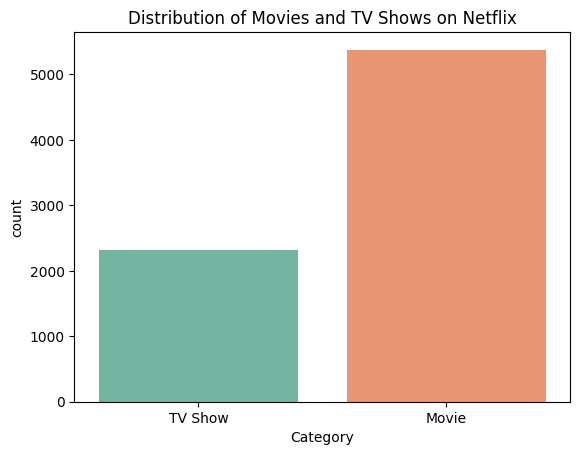

/tmp/ipython-input-2561067016.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')


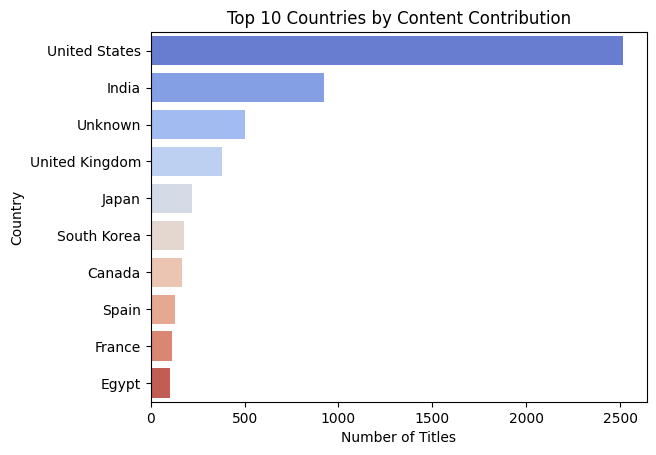

In [ ]:
sns.countplot(x='Category', data=df, palette='Set2')
plt.title("Distribution of Movies and TV Shows on Netflix")
plt.show()
top_countries = df['Country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')
plt.title("Top 10 Countries by Content Contribution")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()


/tmp/ipython-input-259479375.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')


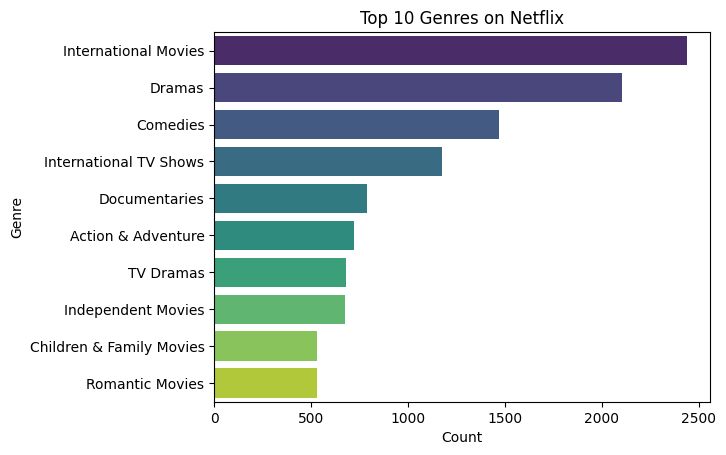

In [ ]:
genres = df['Type'].dropna().str.split(', ')
all_genres = [genre for sublist in genres for genre in sublist]
genre_df = pd.DataFrame(all_genres, columns=['Genre'])
top_genres = genre_df['Genre'].value_counts().head(10)

sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()


/tmp/ipython-input-293029719.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Year_Added', data=df, order=df['Year_Added'].value_counts().index[:15], palette='magma')


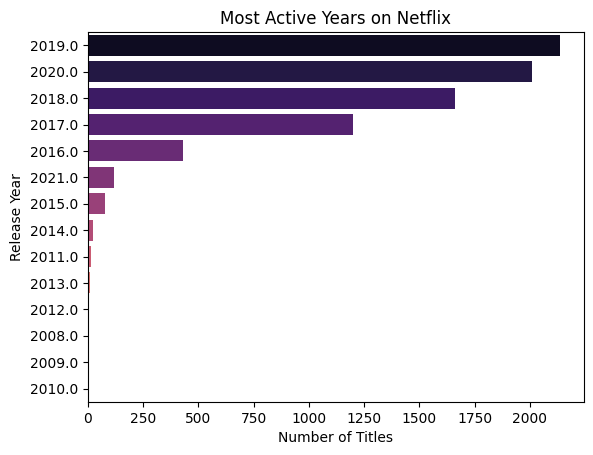

In [ ]:
sns.countplot(y='Year_Added', data=df, order=df['Year_Added'].value_counts().index[:15], palette='magma')
plt.title("Most Active Years on Netflix")
plt.ylabel("Release Year")
plt.xlabel("Number of Titles")
plt.show()


/tmp/ipython-input-152968908.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=df, order=df['Rating'].value_counts().index, palette='plasma')


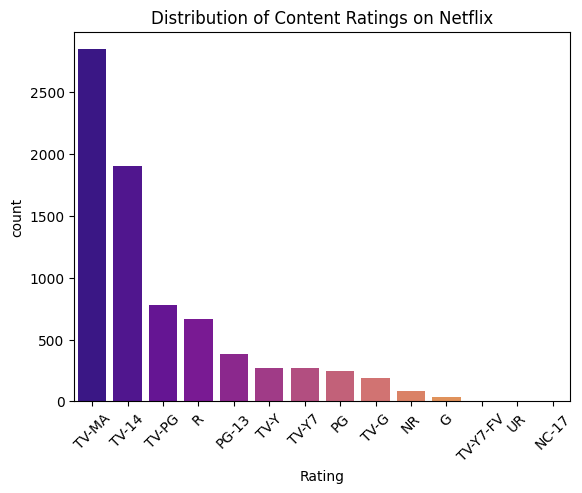

In [ ]:
sns.countplot(x='Rating', data=df, order=df['Rating'].value_counts().index, palette='plasma')
plt.title("Distribution of Content Ratings on Netflix")
plt.xticks(rotation=45)
plt.show()
